In [155]:
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [156]:
from google.colab import drive
drive.mount ('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [157]:
books = pd.read_csv('/content/drive/My Drive/INTRO TO AI/books.csv')
ratings = pd.read_csv('/content/drive/My Drive/INTRO TO AI/Ratings.csv')
users = pd.read_csv('/content/drive/My Drive/INTRO TO AI/users.csv')

<ipython-input-157-8534309fc164>:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv('/content/drive/My Drive/INTRO TO AI/books.csv')


In [158]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,2005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,60973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [159]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,155061224,5
2,276727,446520802,0
3,276729,052165615X,3
4,276729,521795028,6


In [160]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [161]:
print('Number of book data:', len(books.ISBN.unique()))
print('Total book rating data from readers:', len(ratings.ISBN.unique()))
print('Amount of user data:', len(users['User-ID'].unique()))

Number of book data: 271360
Total book rating data from readers: 322473
Amount of user data: 278858


In [162]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [163]:
#converting the year of publication datatype from object to int
books.drop(books[books['Year-Of-Publication']=='DK Publishing Inc'].index, inplace=True)

In [164]:
books.drop(books[books['Year-Of-Publication']=='Gallimard'].index, inplace=True)

In [165]:
books['Year-Of-Publication']= books['Year-Of-Publication'].astype('int')

In [166]:
#refining the publication data to get modern books only
books = books[books['Year-Of-Publication']>=1900]

In [167]:
books.dtypes

ISBN                   object
Book-Title             object
Book-Author            object
Year-Of-Publication     int64
Publisher              object
Image-URL-S            object
Image-URL-M            object
Image-URL-L            object
dtype: object

In [168]:
# Removing Image-URL column of all sizes
books.drop(labels=['Image-URL-S', 'Image-URL-M', 'Image-URL-L'], axis=1, inplace=True)

books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,2005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,60973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


In [169]:
print("Number of Book ISBN numbers:", len(books['ISBN'].unique()))
print("Number of book titles:", len(books['Book-Title'].unique()))
print('Number of book authors:', len(books['Book-Author'].unique()))
print('Number of Publication Years:', len(books['Year-Of-Publication'].unique()))
print('Number of publisher names:', len(books['Publisher'].unique()))

Number of Book ISBN numbers: 266735
Number of book titles: 238503
Number of book authors: 100666
Number of Publication Years: 111
Number of publisher names: 16392


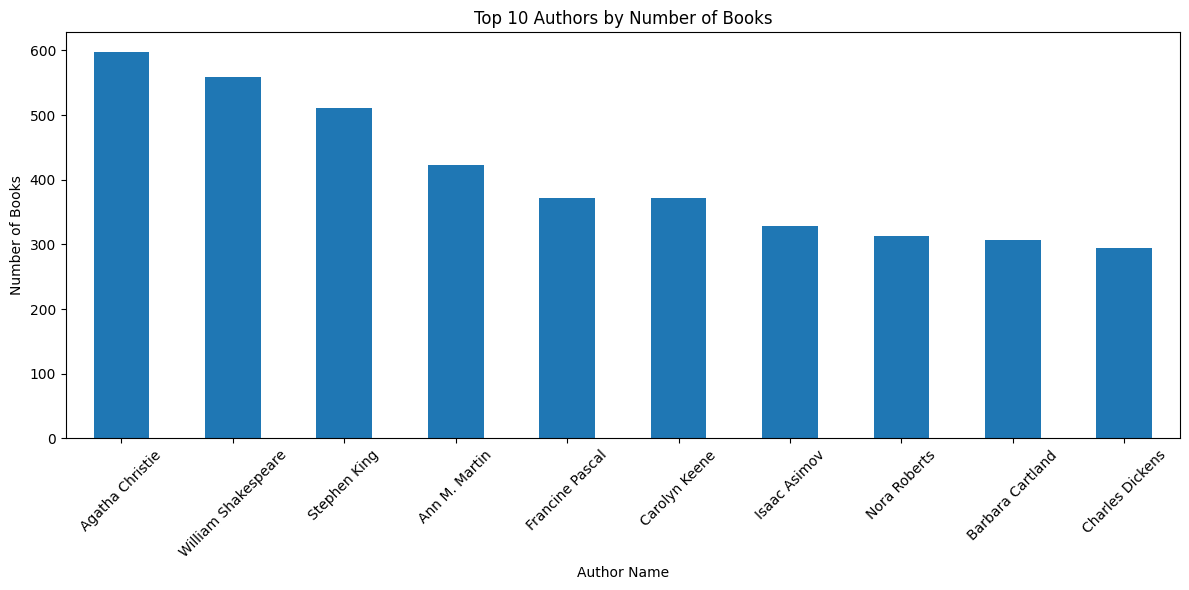

In [170]:
# Grouping Book-Author' and count the number of books written by each author
author_counts = books.groupby('Book-Author')['Book-Title'].count()


sorted_authors = author_counts.sort_values(ascending=False)


top_10_authors = sorted_authors.head(10)

# The plot of the top 10 authors according to the books written
plt.figure(figsize=(12, 6))
top_10_authors.plot(kind='bar')
plt.xlabel('Author Name')
plt.ylabel('Number of Books')
plt.title('Top 10 Authors by Number of Books')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [171]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,155061224,5
2,276727,446520802,0
3,276729,052165615X,3
4,276729,521795028,6


In [172]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1048575 non-null  int64 
 1   ISBN         1048575 non-null  object
 2   Book-Rating  1048575 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


In [173]:
print('Number of User-IDs:', len(ratings['User-ID'].unique()))
print('Number of books based on ISBN:', len(ratings['ISBN'].unique()))

print('Number of book ratings:')
sorted_ratings = ratings['Book-Rating'].value_counts().sort_index()
pd.DataFrame({'Book-Rating': sorted_ratings.index, 'Sum': sorted_ratings.values})

Number of User-IDs: 95513
Number of books based on ISBN: 322473
Number of book ratings:


,Book-Rating,Sum
0,0,651330
1,1,1601
2,2,2492
3,3,5445
4,4,8031
5,5,46953
6,6,33753
7,7,70018
8,8,95037
9,9,62101


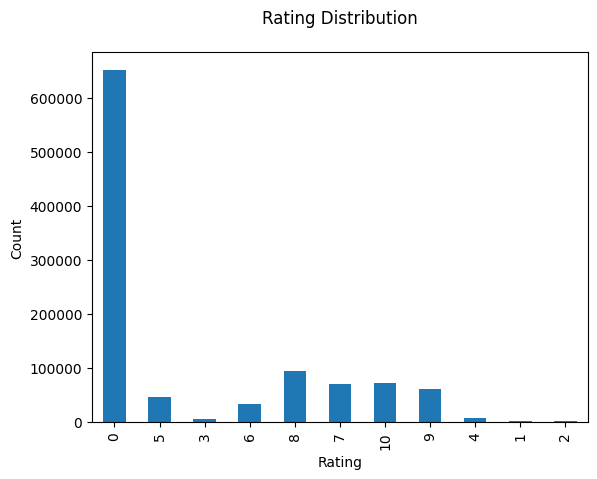

In [174]:
ratings['Book-Rating'].value_counts(sort=False).plot(kind='bar')
plt.title('Rating Distribution\n')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

In [175]:
df_rating = ratings[:20000]
df_rating

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,155061224,5
2,276727,446520802,0
3,276729,052165615X,3
4,276729,521795028,6
...,...,...,...
19995,3757,843222264X,7
19996,3757,8432222658,7
19997,3757,8432222666,7
19998,3757,8432222674,7


In [176]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [177]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [178]:
#dropping the age column
users = users.drop(columns=["Age"])

In [179]:
books_df = pd.merge(ratings, books, on='ISBN', how='left')

In [180]:
books= pd.merge(books_df, users, on= 'User-ID')

# **EDA**

In [181]:
#top 10 books based on ratings
books.sort_values(by='Book-Rating' , ascending=False).head(10)[['Book-Title', 'Book-Author']]

,Book-Title,Book-Author
235113,Seven Up (A Stephanie Plum Novel),Janet Evanovich
975286,Eventide,KENT HARUF
605607,Lord of Far Island,Holt
369966,The New Natural Cat: A Complete Guide for Fini...,Anitra Frazier
506602,NaN,NaN
127102,Love Pirate (Volume 70),Barbara Cartland
605616,The Heart of a Woman,Maya Angelou
506599,Ruby (Landry),V.C. Andrews
605620,Emphasis art: A qualitative art program for el...,Frank Wachowiak
605632,Bridge to Terabithia,Katherine Paterson


In [182]:
#top 15 authors based on overall maximum total rating
books.groupby(['Book-Author']).sum().sort_values(by='Book-Rating' , ascending=False).head(15).index

<ipython-input-182-5075cea68ddb>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  books.groupby(['Book-Author']).sum().sort_values(by='Book-Rating' , ascending=False).head(15).index


Index(['Stephen King', 'Nora Roberts', 'John Grisham', 'James Patterson',
       'J. K. Rowling', 'Mary Higgins Clark', 'Janet Evanovich',
       'Dean R. Koontz', 'Sue Grafton', 'Dan Brown', 'Anne Rice', 'Tom Clancy',
       'Michael Crichton', 'JOHN GRISHAM', 'Nicholas Sparks'],
      dtype='object', name='Book-Author')

In [183]:
#top 15 authors based on overall minimum total rating
books.groupby(['Book-Author']).sum().sort_values(by='Book-Rating' , ascending=True).head(15).index

<ipython-input-183-405fe31a1d85>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  books.groupby(['Book-Author']).sum().sort_values(by='Book-Rating' , ascending=True).head(15).index


Index(['Ã?Â?ric Holder', 'Reyner Banham', 'Reynaldo S. Galang',
       'HonorÃ© de Balzac', 'HonorÃ©-Gabriel de Riquetti Mirabeau', 'Hoogvelt',
       'Hooper', 'Rey Morgan Longyear', 'Hope Campbell',
       'Reynold A. Nicholson', 'Hope Cooke', 'Hope Egan', 'Rex Williams',
       'Hope Norman Coulter', 'Hope Ricciotti'],
      dtype='object', name='Book-Author')

In [184]:
#publication year with the most books
books['Year-Of-Publication'].value_counts().head(1)

2002.0    83615
Name: Year-Of-Publication, dtype: int64

In [185]:
#author with the most books
books['Book-Author'].value_counts().head(1)

Stephen King    8995
Name: Book-Author, dtype: int64

Text(0.5, 1.0, 'Top 10 Publishers')

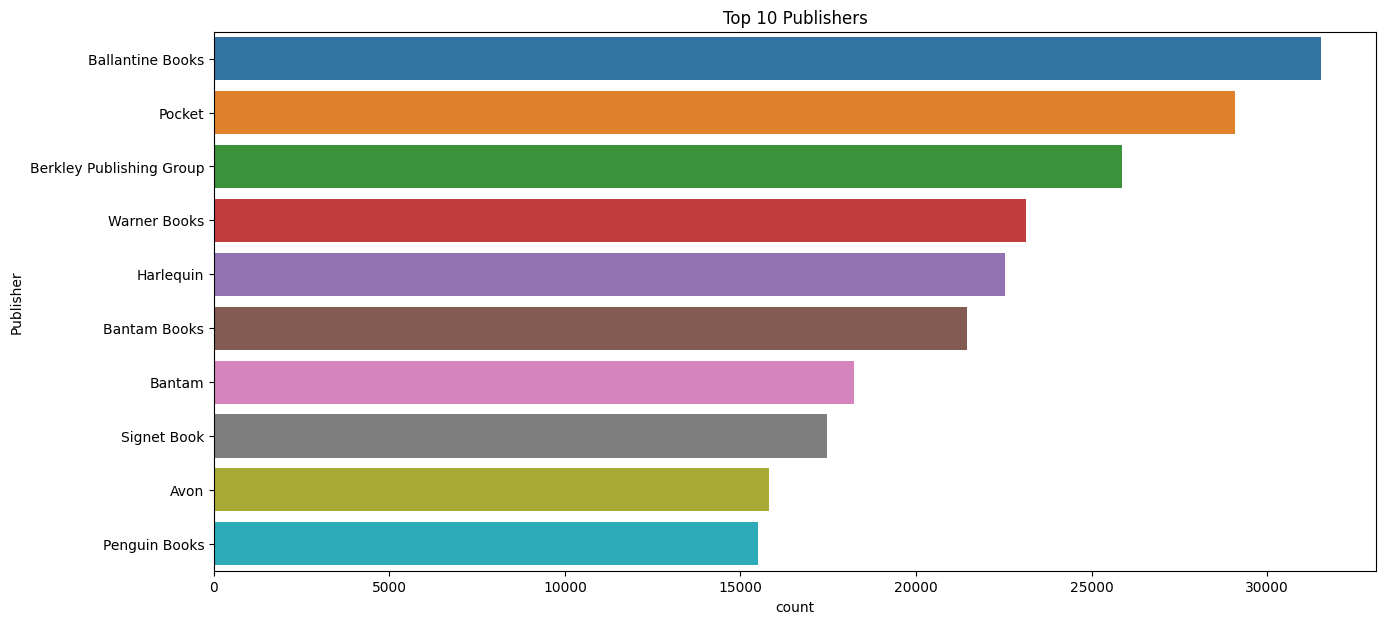

In [186]:
#top 10 publishers with the most books
plt.figure(figsize=(15,7))
sns.countplot(y='Publisher',data=books,order=pd.value_counts(books['Publisher']).iloc[:10].index)
plt.title('Top 10 Publishers')

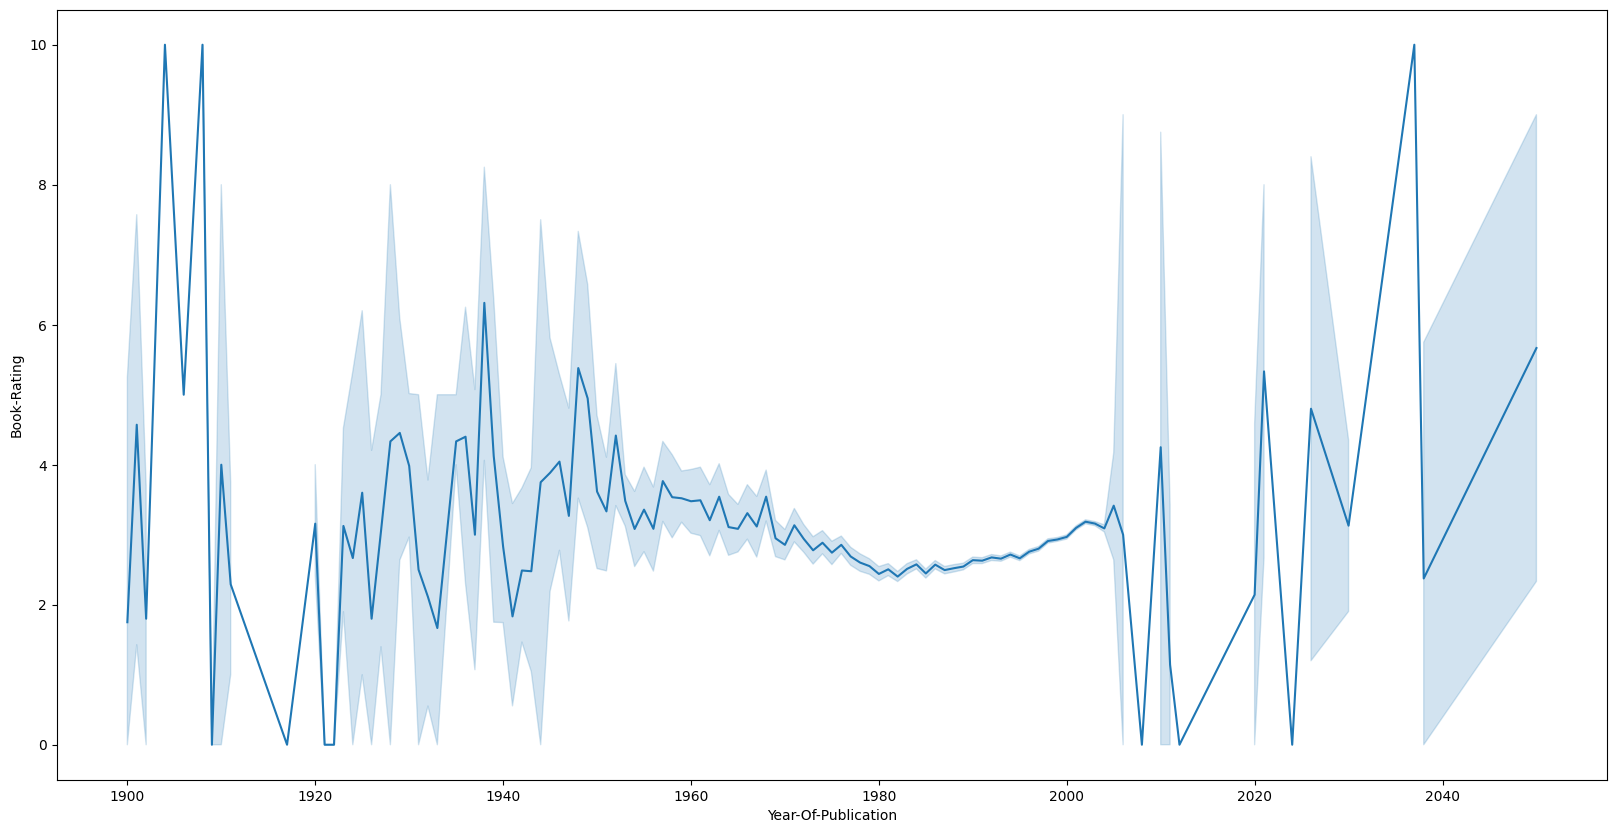

In [187]:
#lineplot showing year of publication against ratings on books
plt.figure(figsize=(20,10))
sns.lineplot(x='Year-Of-Publication',y='Book-Rating', data=books)
plt.show()

# **DATA PREPROCESSING**

In [188]:
books.groupby('ISBN').sum()

<ipython-input-188-367898172105>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  books.groupby('ISBN').sum()


,User-ID,Book-Rating,Year-Of-Publication
ISBN,,,
904492401X,89192,0,0.0
#069580216X,65520,0,0.0
#6612432,199864,5,0.0
(THEWINDMILLP,194500,0,0.0
)416195113,124304,8,0.0
...,...,...,...
cn108465,107301,0,0.0
cn113107,107301,0,0.0
§423350229,85250,0,0.0


In [189]:
all_books_clean = books.dropna()

In [190]:
all_books_clean.isnull().sum()

User-ID                0
ISBN                   0
Book-Rating            0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
Location               0
dtype: int64

In [191]:
# Sorting books by ISBN
fix_books = all_books_clean.sort_values('ISBN', ascending=True)

In [192]:
preparation = fix_books.drop_duplicates('ISBN')
preparation

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Location
103678,23902,000104687X,6,"T.S. Eliot Reading \The Wasteland\"" and Other ...",T.S. Eliot,1993.0,HarperCollins Publishers,"london, england, united kingdom"
122096,28204,000104799X,7,Monk's-hood,Ellis Peters,1994.0,HarperCollins Publishers,"south ohio, nova scotia, canada"
816071,198711,000123207X,0,Paddington's Birthday Party,Michael Bond,1942.0,HarperCollins Publishers,"little canada, minnesota, usa"
922470,224654,000160418X,0,The Clue in the Crumbling Wall,Carolyn Keene,1984.0,HarperCollins Publishers,"watton, england, united kingdom"
547302,131402,000184251X,0,February's Road,John Verney,1987.0,HarperCollins Publishers,"governors bay, canterbury, new zealand"
...,...,...,...,...,...,...,...,...
932521,226370,B0001GMSVW,0,Tricky Business,Dave Barry,2002.0,Putnam Pub Group,"quincy, massachusetts, usa"
613350,148258,B0001I1KOG,10,New York Public Library Literature Companion,New York Public Library,2001.0,Free Press,"toronto, ontario, canada"
340229,81207,B0001PBXMS,0,"Love, etc.",Julian Barnes,2001.0,Knopf,"maia, porto, portugal"
423107,100906,B000234N3A,9,Fraud,David Rakoff,2001.0,Doubleday,"seattle, washington, usa"


In [193]:
# converting the 'ISBN' data series into list form
isbn_id = preparation['ISBN'].tolist()

# converting the 'Book-Title' data series into list form
book_title = preparation['Book-Title'].tolist()

# converting the 'Book-Author' data series into list form
book_author = preparation['Book-Author'].tolist()

# converting the 'Year-Of-Publication' data series into list form
year_of_publication = preparation['Year-Of-Publication'].tolist()

# converting the 'Publisher' data series into list form
publisher = preparation['Publisher'].tolist()

print(len(isbn_id))
print(len(book_title))
print(len(book_author))
print(len(year_of_publication))
print(len(publisher))

253409
253409
253409
253409
253409


In [194]:
books_new = pd.DataFrame({
    'isbn': isbn_id,
    'book_title': book_title,
    'book_author': book_author,
    'year_of_publication': year_of_publication,
    'publisher': publisher

})


In [195]:
books_new = books_new[:20000]

In [196]:
# converting User-ID to a list
user_ids = df_rating['User-ID'].unique().tolist()
print('list userIDs: ', user_ids)

# User-ID encoding
user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}
print('encoded userID: ', user_to_user_encoded)

# encoding numbers into User-ID
user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}
print('encoded number to userID: ', user_encoded_to_user)

list userIDs:  [276725, 276726, 276727, 276729, 276733, 276736, 276737, 276744, 276745, 276746, 276747, 276748, 276751, 276754, 276755, 276760, 276762, 276765, 276768, 276772, 276774, 276780, 276786, 276788, 276796, 276798, 276800, 276803, 276804, 276806, 276808, 276811, 276812, 276813, 276814, 276817, 276820, 276822, 276827, 276828, 276830, 276832, 276833, 276835, 276837, 276838, 276840, 276842, 276847, 276848, 276850, 276852, 276853, 276854, 276856, 276857, 276859, 276861, 276862, 276863, 276866, 276869, 276870, 276872, 276873, 276875, 276878, 276879, 276884, 276887, 276888, 276889, 276890, 276896, 276904, 276905, 276911, 276912, 276915, 276916, 276925, 276927, 276928, 276929, 276934, 276936, 276939, 276943, 276946, 276949, 276950, 276953, 276954, 276957, 276959, 276963, 276964, 276965, 276975, 276981, 276984, 276986, 276988, 276989, 276990, 276992, 276994, 276997, 276998, 277002, 277007, 277009, 277010, 277012, 277018, 277019, 277022, 277023, 277028, 277031, 277032, 277035, 277036, 

In [197]:
# converting ISBNs to a list
isbn_id = df_rating['ISBN'].unique().tolist()

# ISBN encoding
isbn_to_isbn_encoded = {x: i for i, x in enumerate(isbn_id)}

# encoding numbers to ISBN
isbn_encoded_to_isbn = {i: x for i, x in enumerate(isbn_id)}

In [198]:
# Disabling the SettingWithCopyWarning warning
pd.options.mode.chained_assignment = None # "warn" or "raise" to turn it back on

# Mapping User-ID to user dataframe
df_rating['user'] = df_rating['User-ID'].map(user_to_user_encoded)

# Mapping ISBN to book title dataframe
df_rating['book_title'] = df_rating['ISBN'].map(isbn_to_isbn_encoded)

In [199]:
num_users = len(user_to_user_encoded)
print(num_users)

num_book_title = len(isbn_to_isbn_encoded)
print(num_book_title)

# converting the rating to a float value
df_rating['Book-Rating'] = df_rating['Book-Rating'].values.astype(np.float32)

min_rating = min(df_rating['Book-Rating'])

max_rating = max(df_rating['Book-Rating'])

print('Number of Users: {}, Number of Books: {}, Min Rating: {}, Max Rating: {}'.format(
     num_users, num_book_title, min_rating, max_rating
))

2180
17176
Number of Users: 2180, Number of Books: 17176, Min Rating: 0.0, Max Rating: 10.0


# **COLLABORATIVE FILTERING**

In [200]:
df_rating = df_rating.sample(frac=1, random_state=42)
df_rating

,User-ID,ISBN,Book-Rating,user,book_title
10650,446,61000280,10.0,1005,9860
2041,277478,340565276,8.0,273,1978
8668,278418,1569751544,3.0,678,8222
1114,277195,394726413,0.0,173,1098
13902,1928,373196903,0.0,1511,12429
...,...,...,...,...,...
11284,651,1888451084,7.0,1071,10380
11964,929,345331605,7.0,1163,10916
5390,278418,373121962,0.0,678,5065
860,277087,8472230082,5.0,139,850


In [201]:
# creating a variable x to match user data and book title into one value
x = df_rating[['user', 'book_title']].values

# creating a y variable to create a rating of the results
y = df_rating['Book-Rating'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values

# dividing into 90% train data and 10% validation data

train_indices = int(0.9 * df_rating.shape[0])
x_train, x_val, y_train, y_val = (
     x[:train_indices],
     x[train_indices:],
     y[:train_indices],
     y[train_indices:]
)

print(x, y)

[[ 1005  9860]
 [  273  1978]
 [  678  8222]
 ...
 [  678  5065]
 [  139   850]
 [ 1706 13938]] [1.  0.8 0.3 ... 0.  0.5 0. ]


In [202]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input, Embedding, Flatten, Concatenate, Dense
from tensorflow.keras.optimizers import Adam

In [203]:
class RecommenderNet(tf.keras.Model):

     # function initialization
     def __init__(self, num_users, num_book_title, embedding_size, dropout_rate=0.2, **kwargs):
         super(RecommenderNet, self).__init__(**kwargs)
         self.num_users = num_users
         self.num_book_title = num_book_title
         self. embedding_size = embedding_size
         self.dropout_rate = dropout_rate

         self.user_embedding = layers.Embedding( # user embedding layer
             num_users,
             embedding_size,
             embeddings_initializer = 'he_normal',
             embeddings_regularizer =keras.regularizers.l2(1e-6)
         )
         self.user_bias = layers.Embedding(num_users, 1) # layer embedding user bias

         self.book_title_embedding = layers.Embedding( # book_title embedding layer
             num_book_title,
             embedding_size,
             embeddings_initializer = 'he_normal',
             embeddings_regularizer =keras.regularizers.l2(1e-6)
         )
         self.book_title_bias = layers.Embedding(num_book_title, 1) # layer embedding book_title

         self.dropout = layers.Dropout(rate=dropout_rate)

     def call(self, inputs):
         user_vector = self.user_embedding(inputs[:, 0]) # call embedding layer 1
         user_vector = self.dropout(user_vector)
         user_bias = self.user_bias(inputs[:, 0]) # call embedding layer 2

         book_title_vector = self.book_title_embedding(inputs[:, 1]) # call embedding layer 3
         book_title_vector = self.dropout(book_title_vector)
         book_title_bias = self.book_title_bias(inputs[:, 1]) # call embedding layer 4

         dot_user_book_title = tf.tensordot(user_vector, book_title_vector, 2) # dot product multiplication

         x = dot_user_book_title + user_bias + book_title_bias

         return tf.nn.sigmoid(x) # activate sigmoid

In [204]:
model = RecommenderNet(num_users, num_book_title, 50) # initialize model

model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=1e-4),
    metrics = [tf.keras.metrics.RootMeanSquaredError()]
)

In [205]:
# training

history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 16,
    epochs = 5,
    validation_data = (x_val, y_val)
)

Epoch 1/5
1125/1125 [==============================] - 19s 16ms/step - loss: 0.6893 - root_mean_squared_error: 0.4393 - val_loss: 0.6823 - val_root_mean_squared_error: 0.4327
Epoch 2/5
1125/1125 [==============================] - 17s 15ms/step - loss: 0.6687 - root_mean_squared_error: 0.4274 - val_loss: 0.6687 - val_root_mean_squared_error: 0.4248
Epoch 3/5
1125/1125 [==============================] - 18s 16ms/step - loss: 0.6424 - root_mean_squared_error: 0.4120 - val_loss: 0.6561 - val_root_mean_squared_error: 0.4174
Epoch 4/5
1125/1125 [==============================] - 18s 16ms/step - loss: 0.6091 - root_mean_squared_error: 0.3920 - val_loss: 0.6447 - val_root_mean_squared_error: 0.4107
Epoch 5/5
1125/1125 [==============================] - 17s 15ms/step - loss: 0.5778 - root_mean_squared_error: 0.3735 - val_loss: 0.6346 - val_root_mean_squared_error: 0.4046


In [206]:
book_df = books_new

user_id = df_rating['User-ID'].sample(1).iloc[0]
book_read_by_user = df_rating[df_rating['User-ID'] == user_id]

book_not_read = book_df[~book_df['isbn'].isin(book_read_by_user['ISBN'].values)]['isbn']
book_not_read = list(
    set(book_not_read)
    .intersection(set(isbn_to_isbn_encoded.keys()))
)

book_not_read = [[isbn_to_isbn_encoded.get(x)] for x in book_not_read]
user_encoder = user_to_user_encoded.get(user_id)
user_book_array = np.hstack(
    ([[user_encoder]] * len(book_not_read), book_not_read)
)

In [210]:
ratings_model = model.predict(user_book_array).flatten()

top_ratings_indices = ratings_model.argsort()[-3:][::-1]

recommended_book_ids = [
    isbn_encoded_to_isbn.get(book_not_read[x][0]) for x in top_ratings_indices
]

top_book_user = (
    book_read_by_user.sort_values(
        by='Book-Rating',
        ascending=False
    )
    .head(10)['ISBN'].values
)

book_df_rows = book_df[book_df['isbn'].isin(top_book_user)]

book_df_rows_data = []
for row in book_df_rows.itertuples():
    book_df_rows_data.append([row.book_title, row.book_author])

recommended_book = book_df[book_df['isbn'].isin(recommended_book_ids)]

recommended_book_data = []
for row in recommended_book.itertuples():
    recommended_book_data.append([row.book_title, row.book_author])


output_columns = ['Book Title', 'Book Author']
df_book_read_by_user = pd.DataFrame(book_df_rows_data, columns=output_columns)
df_recommended_books = pd.DataFrame(recommended_book_data, columns=output_columns)

print("Here are the top 3 books recommended for you!")
df_recommended_books

35/35 [==============================] - 0s 1ms/step
Showing recommendation for user: 643
Here are the top 3 books recommended for you!


,Book Title,Book Author
0,Out of the Shadows (Shadows Trilogy (Paperback)),Kay Hooper
1,Gilbert: A Comedy of Manners,Judith Martin
2,Uncle Dynamite,P.G. Wodehouse


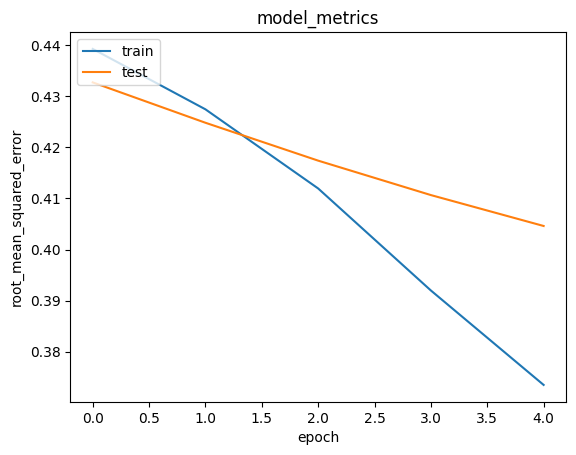

In [211]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('Model Evaluation')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='bottom left')
plt.show()

In [208]:
# Define the full path
save_path = '/content/drive/My Drive/INTRO TO AI/saved_model'

# Save the entire model
model.save(save_path, save_format='tf')